In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df.isna().sum()


Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df['Total_Bathrooms'] = (df['Full Bath'] + 0.5 * df['Half Bath'] + df['Bsmt Full Bath'] + 0.5 * df['Bsmt Half Bath'])

df['House_Age'] = 2025 - df['Year Built']

df['Total_Square_Footage'] = (df['1st Flr SF'] + df['2nd Flr SF'] + df['Total Bsmt SF'])
    
df['Above_Ground_SF'] = df['1st Flr SF'] + df['2nd Flr SF']
    
df['Basement_Percentage'] = np.where(df['Total_Square_Footage'] > 0,df['Total Bsmt SF'] / df['Total_Square_Footage'],0)

df['Quality_Condition_Score'] = df['Overall Qual'] * df['Overall Cond']

df['Has_Garage'] = (df['Garage Type'] != 'No Garage').astype(int)

df['Total_Porch_SF'] = (df['Wood Deck SF'] + df['Open Porch SF'] + df['Enclosed Porch'] + df['3Ssn Porch'] + df['Screen Porch'])
    
df['Has_Pool'] = (df['Pool QC'] != 'No Pool').astype(int)
    
df['Has_Fireplace'] = (df['Fireplace Qu'] != 'No Fireplace').astype(int)

df['Total_Rooms_Above_Grade'] = (df['Bedroom AbvGr'] + df['Kitchen AbvGr'] + df['TotRms AbvGrd'])

df['Premium_Features_Count'] = ((df['Mas Vnr Type'] != 'None').astype(int) + (df['Has_Fireplace']) + (df['Has_Pool']) + (df['Fence'] != 'No Fence').astype(int))

In [6]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Total_Square_Footage,Above_Ground_SF,Basement_Percentage,Quality_Condition_Score,Has_Garage,Total_Porch_SF,Has_Pool,Has_Fireplace,Total_Rooms_Above_Grade,Premium_Features_Count
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2929.000000,2930.000000,2930.000000,2930.000000,2930.0,2930.000000,2930.0,2930.0,2930.000000,2930.0
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,2546.832707,1495.013652,0.406909,33.758020,1.0,182.891468,1.0,1.0,10.341638,4.0
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,803.909695,503.130162,0.109764,9.181182,0.0,159.834420,0.0,0.0,2.289184,0.0
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,334.000000,334.000000,0.000000,1.000000,1.0,0.000000,1.0,1.0,4.000000,4.0
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,2000.000000,1120.000000,0.333333,30.000000,1.0,48.000000,1.0,1.0,9.000000,4.0
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,2452.000000,1440.000000,0.442586,35.000000,1.0,165.000000,1.0,1.0,10.000000,4.0
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,2990.000000,1740.000000,0.500000,40.000000,1.0,266.000000,1.0,1.0,11.000000,4.0
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,11752.000000,5642.000000,0.663082,90.000000,1.0,1424.000000,1.0,1.0,24.000000,4.0


In [7]:
df.shape

(2930, 94)

In [8]:
columns_to_drop = [
        'Full Bath', 'Half Bath', 'Bsmt Full Bath', 'Bsmt Half Bath',

        'Year Built', 'Year Remod/Add',

        '1st Flr SF', '2nd Flr SF', 'Total Bsmt SF',

        'BsmtFin SF 1', 'BsmtFin SF 2',

        'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',

        'Bedroom AbvGr', 'Kitchen AbvGr',

        'Garage Yr Blt'
    ]

existing_cols_to_drop = [col for col in columns_to_drop if col in df.columns]
df.drop(columns=existing_cols_to_drop, inplace=True)

In [9]:
df=df.drop(columns=['Street','Utilities','Pool Area','Low Qual Fin SF'])

In [10]:
df['Mas Vnr Type'].fillna('None', inplace=True)

df['Garage Type'].fillna('No Garage', inplace=True)
df['Garage Qual'].fillna('No Garage', inplace=True)
df['Garage Cond'].fillna('No Garage', inplace=True)
df['Garage Finish'].fillna('No Garage', inplace=True)

df['Bsmt Qual'].fillna('No Basement', inplace=True)
df['Bsmt Cond'].fillna('No Basement', inplace=True)
df['Bsmt Exposure'].fillna('No', inplace=True)
df['BsmtFin Type 1'].fillna('No Basement', inplace=True)
df['BsmtFin Type 2'].fillna('No Basement', inplace=True)

df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

In [11]:
df['Lot Frontage'].fillna(df['Lot Frontage'].median(), inplace=True)
df['Mas Vnr Area'].fillna(0, inplace=True)

df['Garage Area'].fillna(df['Garage Area'].median(), inplace=True)
df['Garage Cars'].fillna(df['Garage Cars'].median(), inplace=True)

df['Bsmt Unf SF'].fillna(df['Bsmt Unf SF'].median(), inplace=True)

In [12]:
df.shape

(2930, 71)

In [13]:
df.isna().sum()

Order                      0
PID                        0
MS SubClass                0
MS Zoning                  0
Lot Frontage               0
                          ..
Total_Porch_SF             0
Has_Pool                   0
Has_Fireplace              0
Total_Rooms_Above_Grade    0
Premium_Features_Count     0
Length: 71, dtype: int64

In [14]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,...,Total_Square_Footage,Above_Ground_SF,Basement_Percentage,Quality_Condition_Score,Has_Garage,Total_Porch_SF,Has_Pool,Has_Fireplace,Total_Rooms_Above_Grade,Premium_Features_Count
0,1,526301100,20,RL,141.0,31770,NaN,IR1,Lvl,Corner,...,2736.0,1656,0.394737,30,1,272,1,1,11,4
1,2,526350040,20,RH,80.0,11622,NaN,Reg,Lvl,Inside,...,1778.0,896,0.496063,30,1,260,1,1,8,4
2,3,526351010,20,RL,81.0,14267,NaN,IR1,Lvl,Corner,...,2658.0,1329,0.500000,36,1,429,1,1,10,4
3,4,526353030,20,RL,93.0,11160,NaN,Reg,Lvl,Corner,...,4220.0,2110,0.500000,35,1,0,1,1,12,4
4,5,527105010,60,RL,74.0,13830,NaN,IR1,Lvl,Inside,...,2557.0,1629,0.362925,25,1,246,1,1,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,NaN,IR1,Lvl,CulDSac,...,2006.0,1003,0.500000,36,1,120,1,1,10,4
2926,2927,923276100,20,RL,68.0,8885,NaN,IR1,Low,Inside,...,1766.0,902,0.489241,25,1,164,1,1,8,4
2927,2928,923400125,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,...,1882.0,970,0.484591,25,1,112,1,1,10,4
2928,2929,924100070,20,RL,77.0,10010,NaN,Reg,Lvl,Inside,...,2778.0,1389,0.500000,25,1,278,1,1,9,4


In [15]:
df.drop(columns=['Order','PID'])

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Alley,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,...,Total_Square_Footage,Above_Ground_SF,Basement_Percentage,Quality_Condition_Score,Has_Garage,Total_Porch_SF,Has_Pool,Has_Fireplace,Total_Rooms_Above_Grade,Premium_Features_Count
0,20,RL,141.0,31770,NaN,IR1,Lvl,Corner,Gtl,NAmes,...,2736.0,1656,0.394737,30,1,272,1,1,11,4
1,20,RH,80.0,11622,NaN,Reg,Lvl,Inside,Gtl,NAmes,...,1778.0,896,0.496063,30,1,260,1,1,8,4
2,20,RL,81.0,14267,NaN,IR1,Lvl,Corner,Gtl,NAmes,...,2658.0,1329,0.500000,36,1,429,1,1,10,4
3,20,RL,93.0,11160,NaN,Reg,Lvl,Corner,Gtl,NAmes,...,4220.0,2110,0.500000,35,1,0,1,1,12,4
4,60,RL,74.0,13830,NaN,IR1,Lvl,Inside,Gtl,Gilbert,...,2557.0,1629,0.362925,25,1,246,1,1,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,NaN,IR1,Lvl,CulDSac,Gtl,Mitchel,...,2006.0,1003,0.500000,36,1,120,1,1,10,4
2926,20,RL,68.0,8885,NaN,IR1,Low,Inside,Mod,Mitchel,...,1766.0,902,0.489241,25,1,164,1,1,8,4
2927,85,RL,62.0,10441,NaN,Reg,Lvl,Inside,Gtl,Mitchel,...,1882.0,970,0.484591,25,1,112,1,1,10,4
2928,20,RL,77.0,10010,NaN,Reg,Lvl,Inside,Mod,Mitchel,...,2778.0,1389,0.500000,25,1,278,1,1,9,4


In [16]:
columns_to_drop_additional = [
    'Pool QC', 
    'Misc Feature',
    'Alley',
    'Fence',
    'TotRms AbvGrd',
    'Garage Type', 
    'Garage Qual', 
    'Garage Cond',
    'Fireplace Qu'
]

# Drop only existing columns
existing_cols = [col for col in columns_to_drop_additional if col in df.columns]
df.drop(columns=existing_cols, inplace=True)

In [17]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,...,Total_Square_Footage,Above_Ground_SF,Basement_Percentage,Quality_Condition_Score,Has_Garage,Total_Porch_SF,Has_Pool,Has_Fireplace,Total_Rooms_Above_Grade,Premium_Features_Count
0,1,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,Gtl,...,2736.0,1656,0.394737,30,1,272,1,1,11,4
1,2,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,...,1778.0,896,0.496063,30,1,260,1,1,8,4
2,3,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,...,2658.0,1329,0.500000,36,1,429,1,1,10,4
3,4,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,Gtl,...,4220.0,2110,0.500000,35,1,0,1,1,12,4
4,5,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,...,2557.0,1629,0.362925,25,1,246,1,1,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,IR1,Lvl,CulDSac,Gtl,...,2006.0,1003,0.500000,36,1,120,1,1,10,4
2926,2927,923276100,20,RL,68.0,8885,IR1,Low,Inside,Mod,...,1766.0,902,0.489241,25,1,164,1,1,8,4
2927,2928,923400125,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,...,1882.0,970,0.484591,25,1,112,1,1,10,4
2928,2929,924100070,20,RL,77.0,10010,Reg,Lvl,Inside,Mod,...,2778.0,1389,0.500000,25,1,278,1,1,9,4


In [18]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,Bsmt Unf SF,Gr Liv Area,...,Total_Square_Footage,Above_Ground_SF,Basement_Percentage,Quality_Condition_Score,Has_Garage,Total_Porch_SF,Has_Pool,Has_Fireplace,Total_Rooms_Above_Grade,Premium_Features_Count
count,2930.00000,2.930000e+03,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,...,2929.000000,2930.000000,2930.000000,2930.000000,2930.0,2930.000000,2930.0,2930.0,2930.000000,2930.0
mean,1465.50000,7.144645e+08,57.387372,69.019795,10147.921843,6.094881,5.563140,101.096928,559.230717,1499.690444,...,2546.832707,1495.013652,0.406909,33.758020,1.0,182.891468,1.0,1.0,10.341638,4.0
std,845.96247,1.887308e+08,42.638025,21.326422,7880.017759,1.411026,1.111537,178.634545,439.422500,505.508887,...,803.909695,503.130162,0.109764,9.181182,0.0,159.834420,0.0,0.0,2.289184,0.0
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,334.000000,...,334.000000,334.000000,0.000000,1.000000,1.0,0.000000,1.0,1.0,4.000000,4.0
25%,733.25000,5.284770e+08,20.000000,60.000000,7440.250000,5.000000,5.000000,0.000000,219.000000,1126.000000,...,2000.000000,1120.000000,0.333333,30.000000,1.0,48.000000,1.0,1.0,9.000000,4.0
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,0.000000,466.000000,1442.000000,...,2452.000000,1440.000000,0.442586,35.000000,1.0,165.000000,1.0,1.0,10.000000,4.0
75%,2197.75000,9.071811e+08,70.000000,78.000000,11555.250000,7.000000,6.000000,162.750000,801.750000,1742.750000,...,2990.000000,1740.000000,0.500000,40.000000,1.0,266.000000,1.0,1.0,11.000000,4.0
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,2336.000000,5642.000000,...,11752.000000,5642.000000,0.663082,90.000000,1.0,1424.000000,1.0,1.0,24.000000,4.0


In [19]:
df.dtypes

Order                        int64
PID                          int64
MS SubClass                  int64
MS Zoning                   object
Lot Frontage               float64
                            ...   
Total_Porch_SF               int64
Has_Pool                     int64
Has_Fireplace                int64
Total_Rooms_Above_Grade      int64
Premium_Features_Count       int64
Length: 62, dtype: object

In [20]:
int_columns = [
    'Mo Sold', 'Yr Sold', 'Overall Qual', 'Overall Cond', 
    'Garage Cars', 'Fireplaces', 'Has_Garage', 'Has_Pool', 
    'Has_Fireplace', 'Premium_Features_Count'
]

for col in int_columns:
    if col in df.columns:
        df[col] = df[col].astype('int32')

object_columns = [
    'MS SubClass', 'MS Zoning', 'Lot Shape', 'Land Contour', 'Lot Config',
    'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
    'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd',
    'Mas Vnr Type', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
    'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC', 'Central Air',
    'Electrical', 'Garage Finish', 'Sale Type', 'Sale Condition'
]

for col in object_columns:
    if col in df.columns:
        df[col] = df[col].astype('object')

In [21]:
df.dtypes

Order                        int64
PID                          int64
MS SubClass                 object
MS Zoning                   object
Lot Frontage               float64
                            ...   
Total_Porch_SF               int64
Has_Pool                     int32
Has_Fireplace                int32
Total_Rooms_Above_Grade      int64
Premium_Features_Count       int32
Length: 62, dtype: object

In [22]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,...,Total_Square_Footage,Above_Ground_SF,Basement_Percentage,Quality_Condition_Score,Has_Garage,Total_Porch_SF,Has_Pool,Has_Fireplace,Total_Rooms_Above_Grade,Premium_Features_Count
0,1,526301100,20,RL,141.0,31770,IR1,Lvl,Corner,Gtl,...,2736.0,1656,0.394737,30,1,272,1,1,11,4
1,2,526350040,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,...,1778.0,896,0.496063,30,1,260,1,1,8,4
2,3,526351010,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,...,2658.0,1329,0.500000,36,1,429,1,1,10,4
3,4,526353030,20,RL,93.0,11160,Reg,Lvl,Corner,Gtl,...,4220.0,2110,0.500000,35,1,0,1,1,12,4
4,5,527105010,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,...,2557.0,1629,0.362925,25,1,246,1,1,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,IR1,Lvl,CulDSac,Gtl,...,2006.0,1003,0.500000,36,1,120,1,1,10,4
2926,2927,923276100,20,RL,68.0,8885,IR1,Low,Inside,Mod,...,1766.0,902,0.489241,25,1,164,1,1,8,4
2927,2928,923400125,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,...,1882.0,970,0.484591,25,1,112,1,1,10,4
2928,2929,924100070,20,RL,77.0,10010,Reg,Lvl,Inside,Mod,...,2778.0,1389,0.500000,25,1,278,1,1,9,4


In [23]:
df=df.drop(columns=['Order','PID'])

In [24]:
df

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Land Contour,Lot Config,Land Slope,Neighborhood,Condition 1,...,Total_Square_Footage,Above_Ground_SF,Basement_Percentage,Quality_Condition_Score,Has_Garage,Total_Porch_SF,Has_Pool,Has_Fireplace,Total_Rooms_Above_Grade,Premium_Features_Count
0,20,RL,141.0,31770,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,2736.0,1656,0.394737,30,1,272,1,1,11,4
1,20,RH,80.0,11622,Reg,Lvl,Inside,Gtl,NAmes,Feedr,...,1778.0,896,0.496063,30,1,260,1,1,8,4
2,20,RL,81.0,14267,IR1,Lvl,Corner,Gtl,NAmes,Norm,...,2658.0,1329,0.500000,36,1,429,1,1,10,4
3,20,RL,93.0,11160,Reg,Lvl,Corner,Gtl,NAmes,Norm,...,4220.0,2110,0.500000,35,1,0,1,1,12,4
4,60,RL,74.0,13830,IR1,Lvl,Inside,Gtl,Gilbert,Norm,...,2557.0,1629,0.362925,25,1,246,1,1,10,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,37.0,7937,IR1,Lvl,CulDSac,Gtl,Mitchel,Norm,...,2006.0,1003,0.500000,36,1,120,1,1,10,4
2926,20,RL,68.0,8885,IR1,Low,Inside,Mod,Mitchel,Norm,...,1766.0,902,0.489241,25,1,164,1,1,8,4
2927,85,RL,62.0,10441,Reg,Lvl,Inside,Gtl,Mitchel,Norm,...,1882.0,970,0.484591,25,1,112,1,1,10,4
2928,20,RL,77.0,10010,Reg,Lvl,Inside,Mod,Mitchel,Norm,...,2778.0,1389,0.500000,25,1,278,1,1,9,4


In [ ]:
print("Columns with NaN values:")
print(df.isna().sum()[df.isna().sum() > 0])

Columns with NaN values:
Total_Bathrooms         2
Total_Square_Footage    1
dtype: int64


In [26]:
# Fill numeric columns with median
numeric_columns = df.select_dtypes(include=['int32', 'int64', 'float64']).columns
for col in numeric_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no NaN values remain
print("Checking for any remaining NaN values:")
print(df.isna().sum()[df.isna().sum() > 0])

df.shape

Checking for any remaining NaN values:
Series([], dtype: int64)


(2930, 60)

In [27]:
df.duplicated().sum()

np.int64(0)

In [28]:
# Check numeric columns for outliers
def check_outliers(df):
    numeric_cols = df.select_dtypes(include=['int32', 'int64', 'float64']).columns
    outlier_stats = pd.DataFrame()
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        outlier_stats.loc[col, 'outliers'] = outliers
        
    return outlier_stats[outlier_stats['outliers'] > 0]

print("\nColumns with potential outliers:")
print(check_outliers(df))


Columns with potential outliers:
                         outliers
Lot Frontage                261.0
Lot Area                    127.0
Overall Qual                  4.0
Overall Cond                252.0
Mas Vnr Area                203.0
Bsmt Unf SF                  56.0
Gr Liv Area                  75.0
Fireplaces                   13.0
Garage Cars                  17.0
Garage Area                  42.0
Misc Val                    103.0
SalePrice                   137.0
Total_Bathrooms              25.0
House_Age                     9.0
Total_Square_Footage         52.0
Above_Ground_SF              73.0
Basement_Percentage          80.0
Quality_Condition_Score     114.0
Total_Porch_SF               64.0
Total_Rooms_Above_Grade     163.0


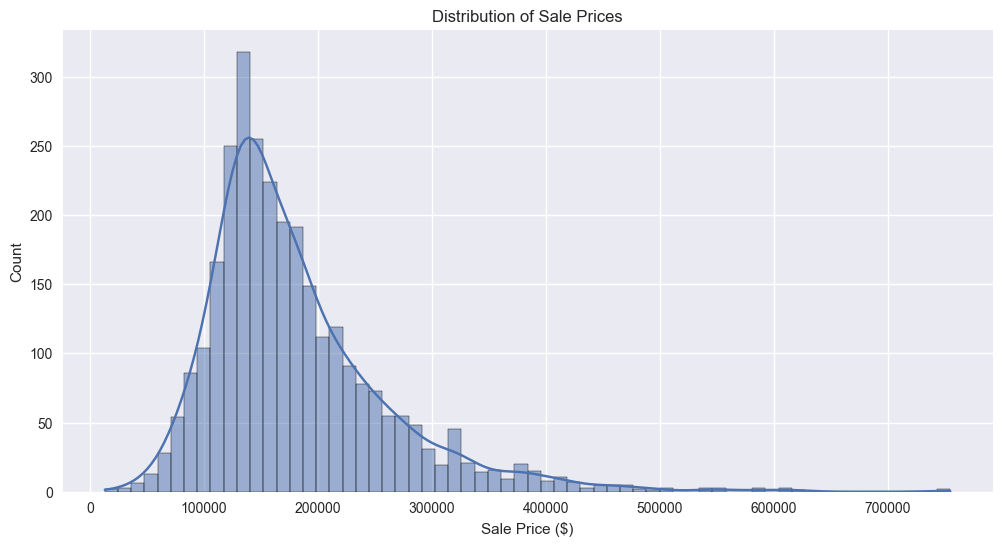

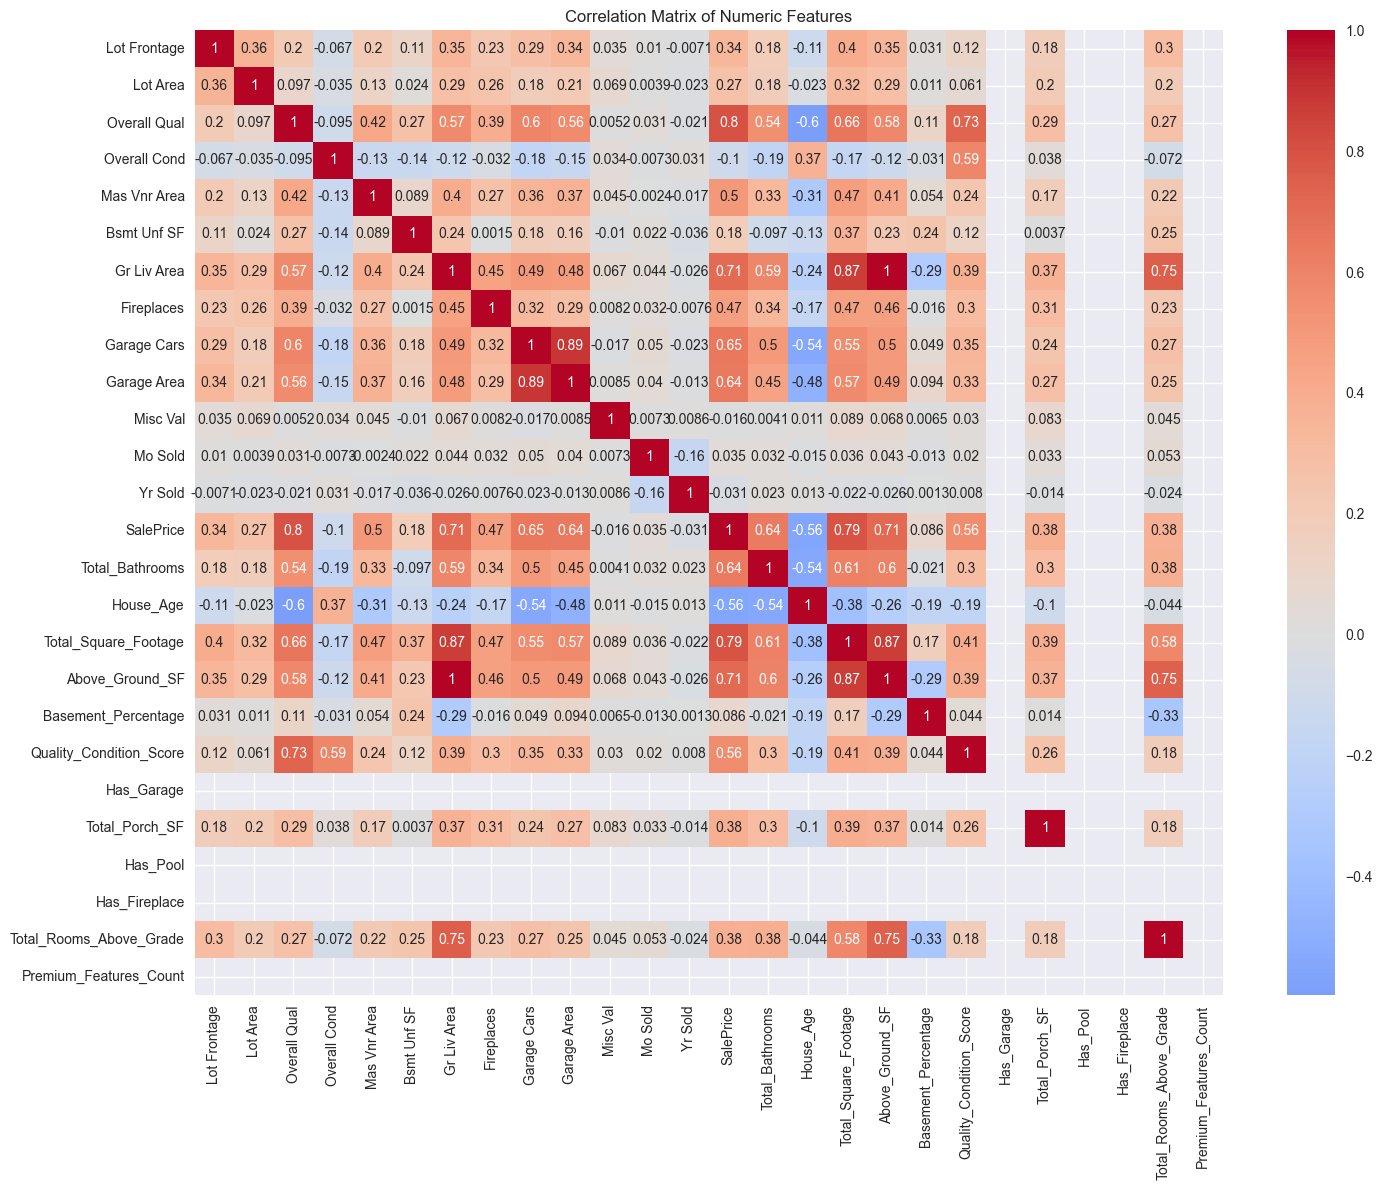

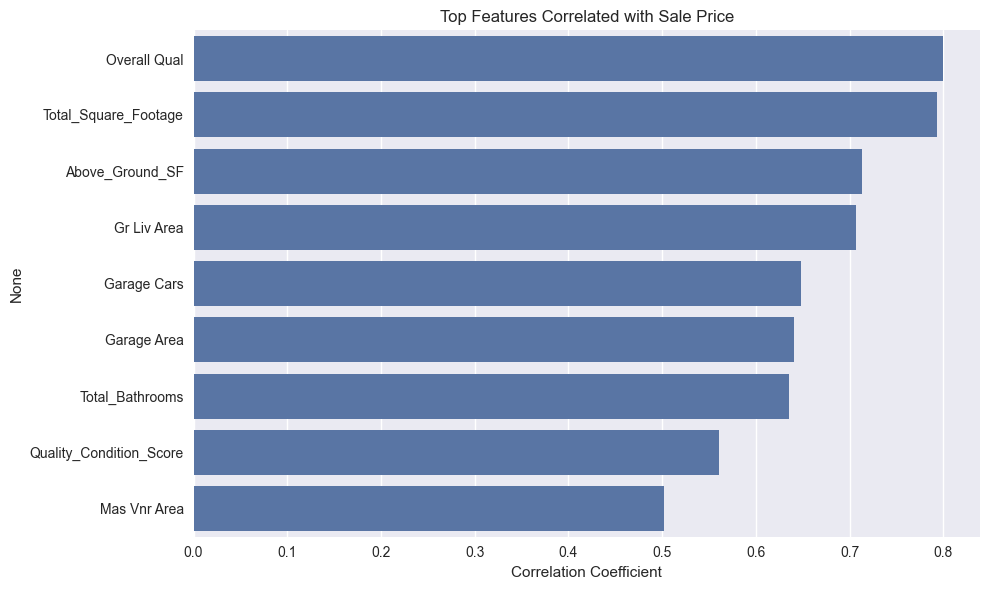

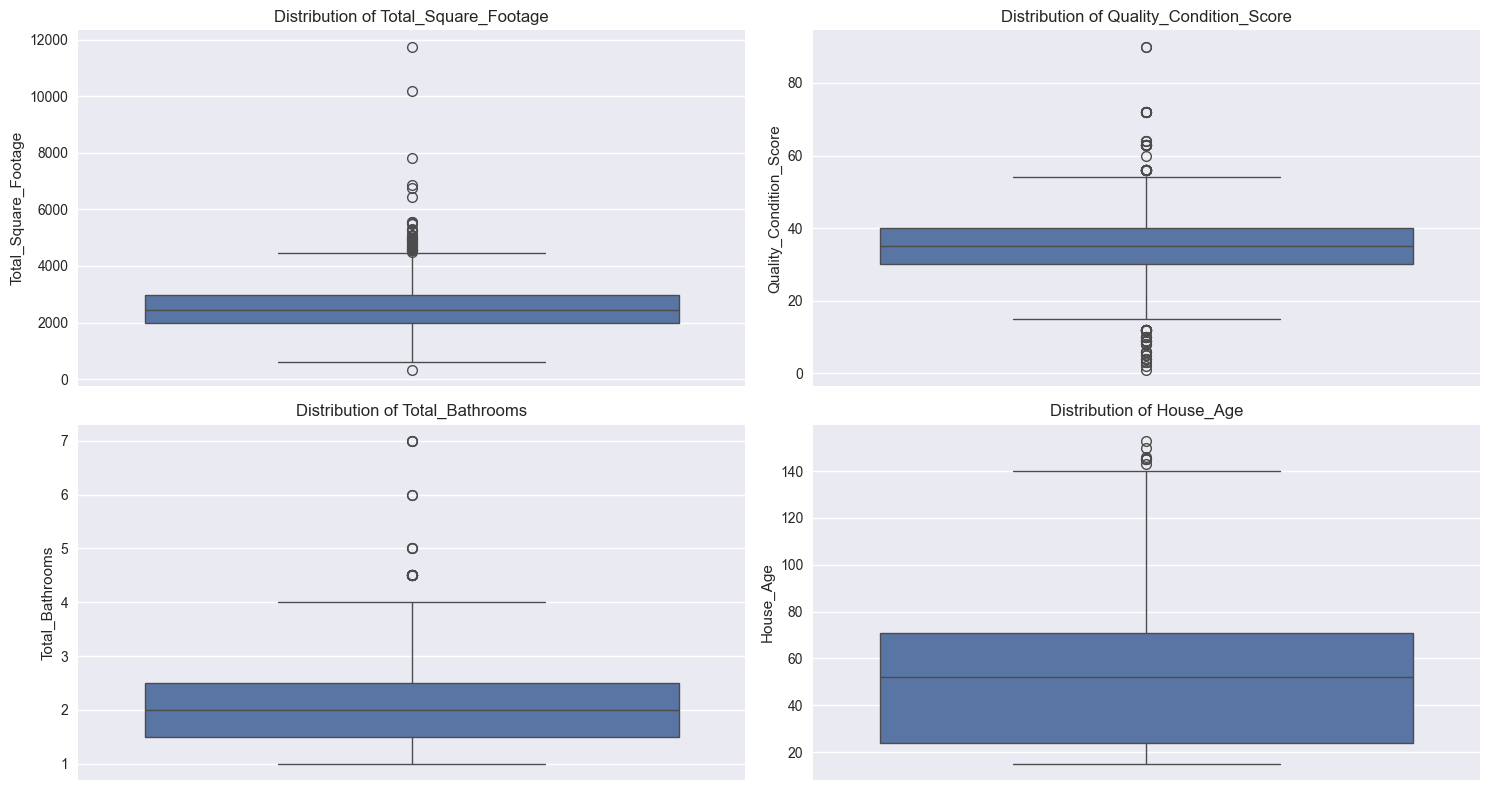

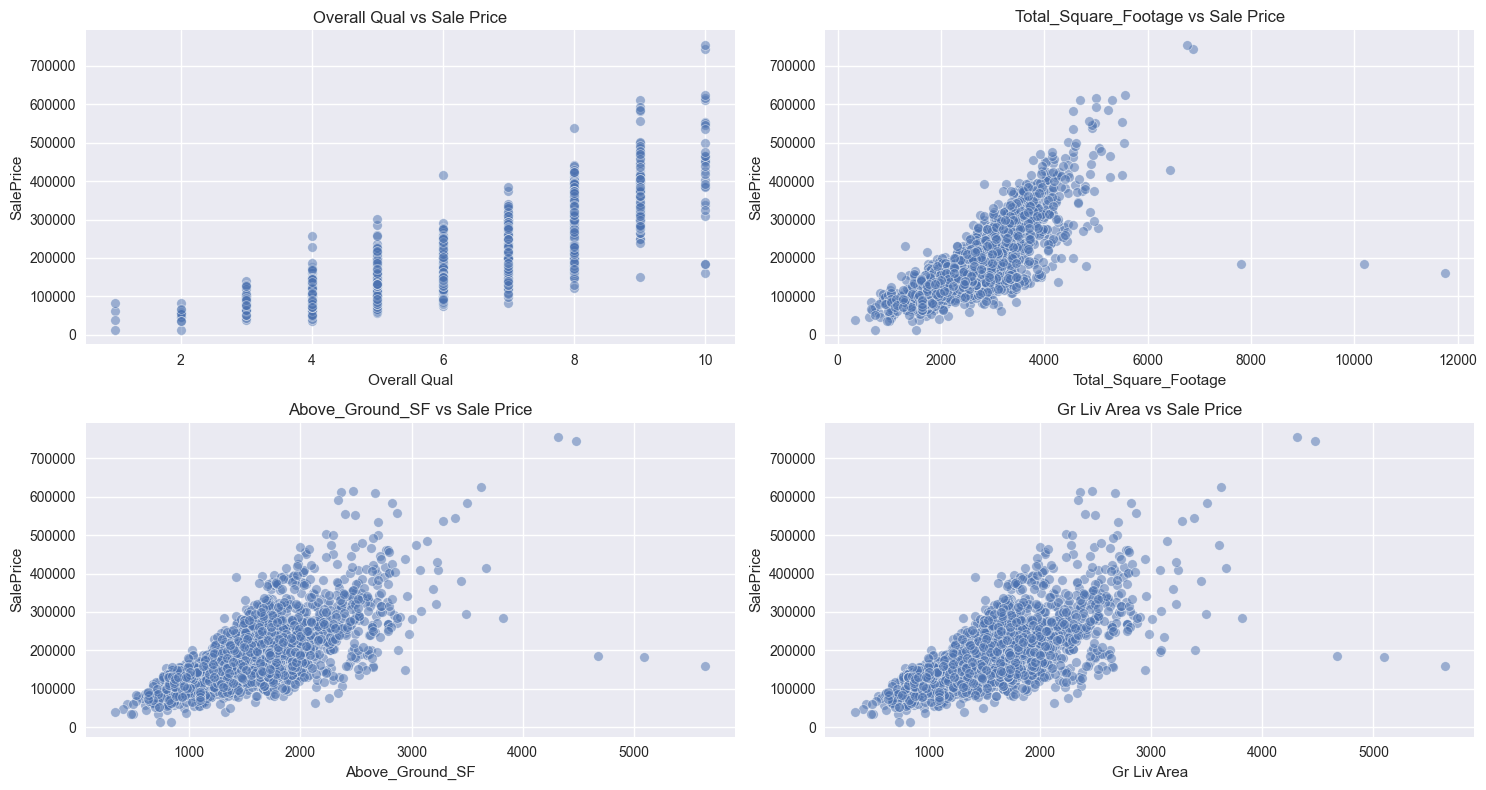

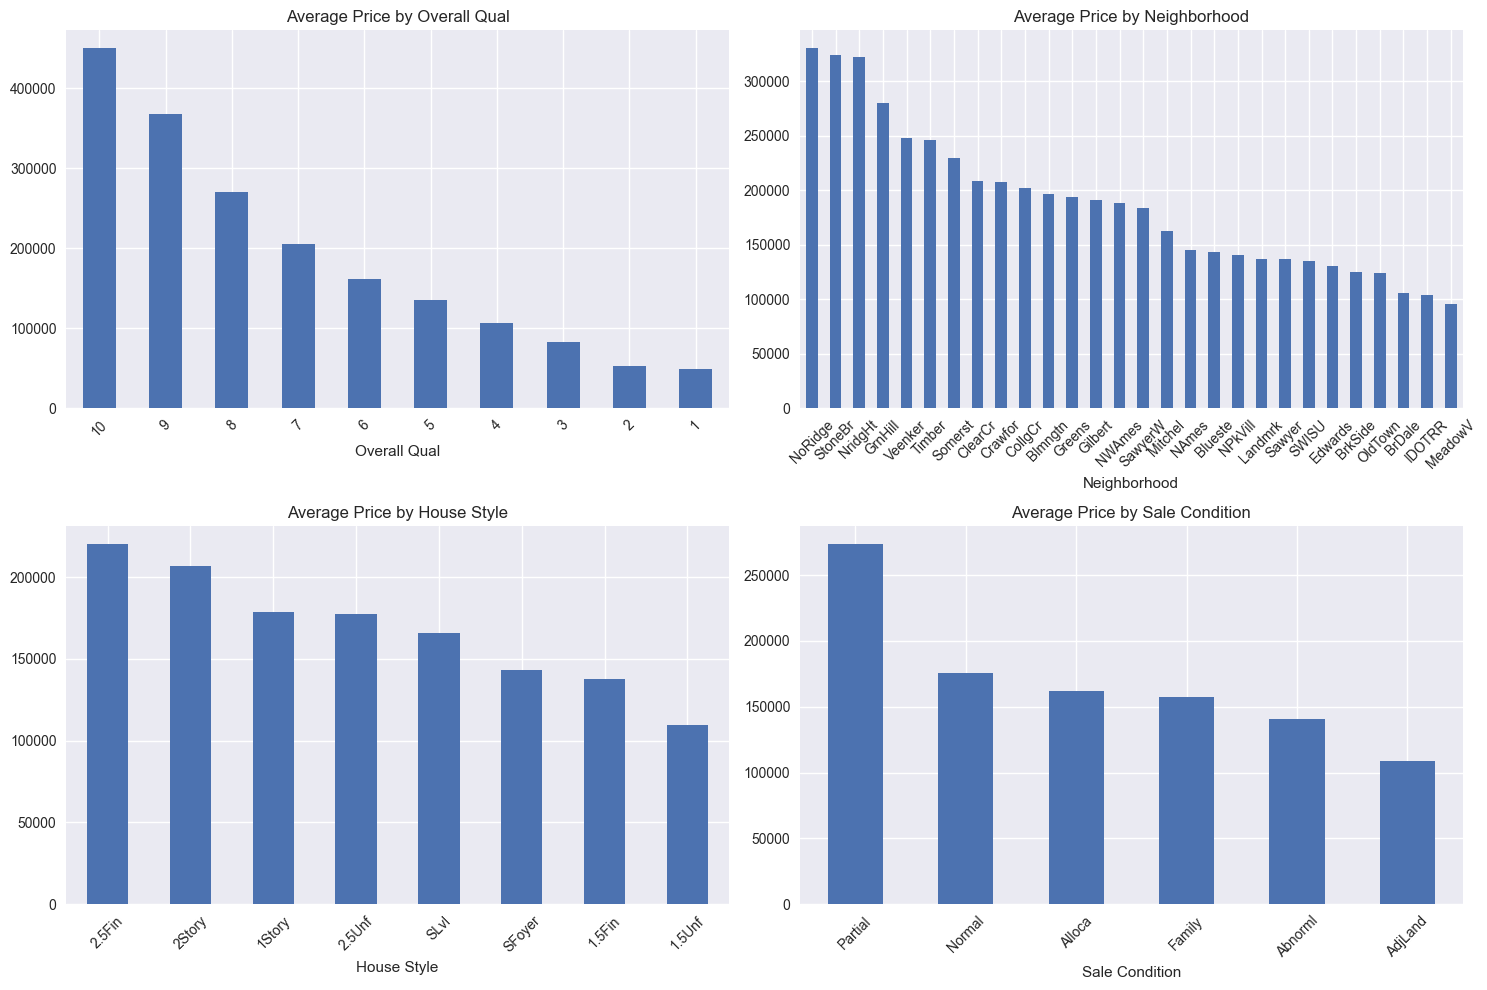

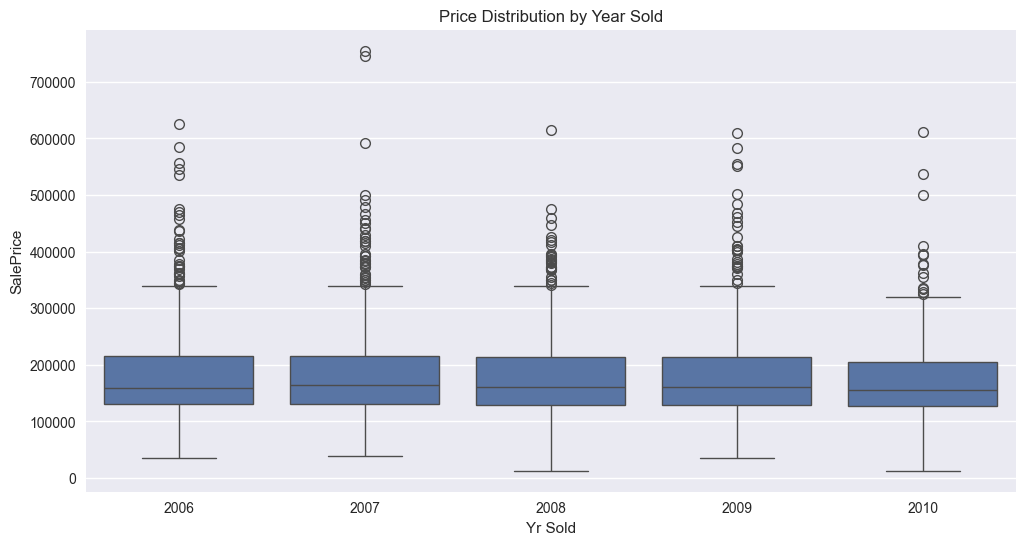

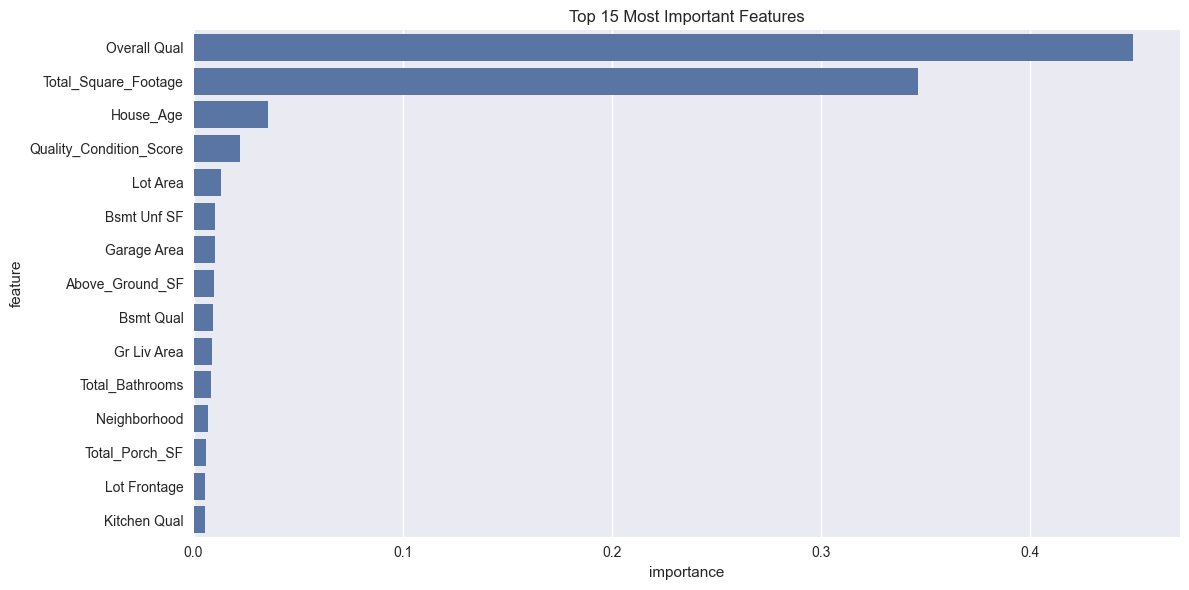

In [30]:
# Set up the style for better visualizations
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Distribution of Sale Price
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='SalePrice', kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price ($)')
plt.ylabel('Count')
plt.show()

# 2. Correlation Matrix for Numeric Features
plt.figure(figsize=(15, 12))
numeric_cols = df.select_dtypes(include=['int32', 'int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Features')
plt.tight_layout()
plt.show()

# 3. Top 10 Features Correlated with Sale Price
top_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corr.values[1:], y=top_corr.index[1:])
plt.title('Top Features Correlated with Sale Price')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# 4. Box Plots for Key Numeric Features
key_features = ['Total_Square_Footage', 'Quality_Condition_Score', 'Total_Bathrooms', 'House_Age']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# 5. Scatter Plots of Top Features vs Sale Price
plt.figure(figsize=(15, 8))
for i, feature in enumerate(top_corr.index[1:5], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(data=df, x=feature, y='SalePrice', alpha=0.5)
    plt.title(f'{feature} vs Sale Price')
plt.tight_layout()
plt.show()

# 6. Categorical Features Analysis
cat_features = ['Overall Qual', 'Neighborhood', 'House Style', 'Sale Condition']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    df.groupby(feature)['SalePrice'].mean().sort_values(ascending=False).plot(kind='bar')
    plt.title(f'Average Price by {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Year Sold vs Price Trend
plt.figure(figsize=(12, 6))
sns.boxplot(x='Yr Sold', y='SalePrice', data=df)
plt.title('Price Distribution by Year Sold')
plt.xticks(rotation=0)
plt.show()

# 8. Feature Importance using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Prepare data for Random Forest
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Encode categorical variables
le = LabelEncoder()
for col in X.select_dtypes(include=['object']):
    X[col] = le.fit_transform(X[col])

# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Plot feature importance
plt.figure(figsize=(12, 6))
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()